In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

        Date    Open    High     Low   Close   Volume
0  30-Jun-17  943.99  945.00  929.61  929.68  2287662
1  29-Jun-17  951.35  951.66  929.60  937.82  3206674
2  28-Jun-17  950.66  963.24  936.16  961.01  2745568
3  27-Jun-17  961.60  967.22  947.09  948.09  2443602
4  26-Jun-17  990.00  993.99  970.33  972.09  1517912


Open   --- mean : 382.51416852146264   	 Std:  213.48651683323408   	 Max:  1005.49   	 Min:  87.74
High   --- mean : 385.8720985691574   	 Std:  214.60229511464593   	 Max:  1008.61   	 Min:  89.29
Low    --- mean : 378.7371255961844   	 Std:  212.08010983015183   	 Max:  996.62   	 Min:  86.37
Close  --- mean : 382.3502480127186   	 Std:  213.43595872312488   	 Max:  1004.28   	 Min:  87.58
Volume --- mean : 4205707.889666136   	 Std:  3877483.007730211   	 Max:  41182889   	 Min:  521141


In [10]:
import pandas as pd

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler


def get_normalised_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    numerical = ['Open', 'Close', 'Volume']
    data[numerical] = scaler.fit_transform(data[numerical])

    return data


def remove_data(data):
    """
    Remove columns from the data
    :param data: a record of all the stock prices with columns as  ['Date','Open','High','Low','Close','Volume']
    :return: a DataFrame with columns as  ['index','Open','Close','Volume']
    """
    # Define columns of data to keep from historical stock data
    item = []
    open = []
    close = []
    volume = []

    # Loop through the stock data objects backwards and store factors we want to keep
    i_counter = 0
    for i in range(len(data) - 1, -1, -1):
        item.append(i_counter)
        open.append(data['Open'][i])
        close.append(data['Close'][i])
        volume.append(data['Volume'][i])
        i_counter += 1

    # Create a data frame for stock data
    stocks = pd.DataFrame()

    # Add factors to data frame
    stocks['Item'] = item
    stocks['Open'] = open
    stocks['Close'] = pd.to_numeric(close)
    stocks['Volume'] = pd.to_numeric(volume)

    # return new formatted data
    return stocks



In [11]:
stocks = remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item    Open   Close    Volume
0     0   98.80  101.46  15860692
1     1  100.77   97.35  13762396
2     2   96.82   96.85   8239545
3     3   97.72   94.37  10389803
4     4   95.42   97.02   9666175
---
      Item    Open   Close   Volume
3140  3140  990.00  972.09  1517912
3141  3141  961.60  948.09  2443602
3142  3142  950.66  961.01  2745568
3143  3143  951.35  937.82  3206674
3144  3144  943.99  929.68  2287662


In [12]:
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)


def price(x):
    """
    format the coords message box
    :param x: data to be formatted
    :return: formatted data
    """
    return '$%1.2f' % x


def plot_basic(stocks, title='Google Trading', y_label='Price USD', x_label='Trading Days'):
    """
    Plots basic pyplot
    :param stocks: DataFrame having all the necessary data
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig, ax = plt.subplots()
    ax.plot(stocks['Item'], stocks['Close'], '#0A7388')

    ax.format_ydata = price
    ax.set_title(title)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()


def plot_prediction(actual, prediction, title='Google Trading vs Prediction', y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')

    plt.show()


def plot_lstm_prediction(actual, prediction, title='Google Trading vs Prediction', y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')


    plt.show()

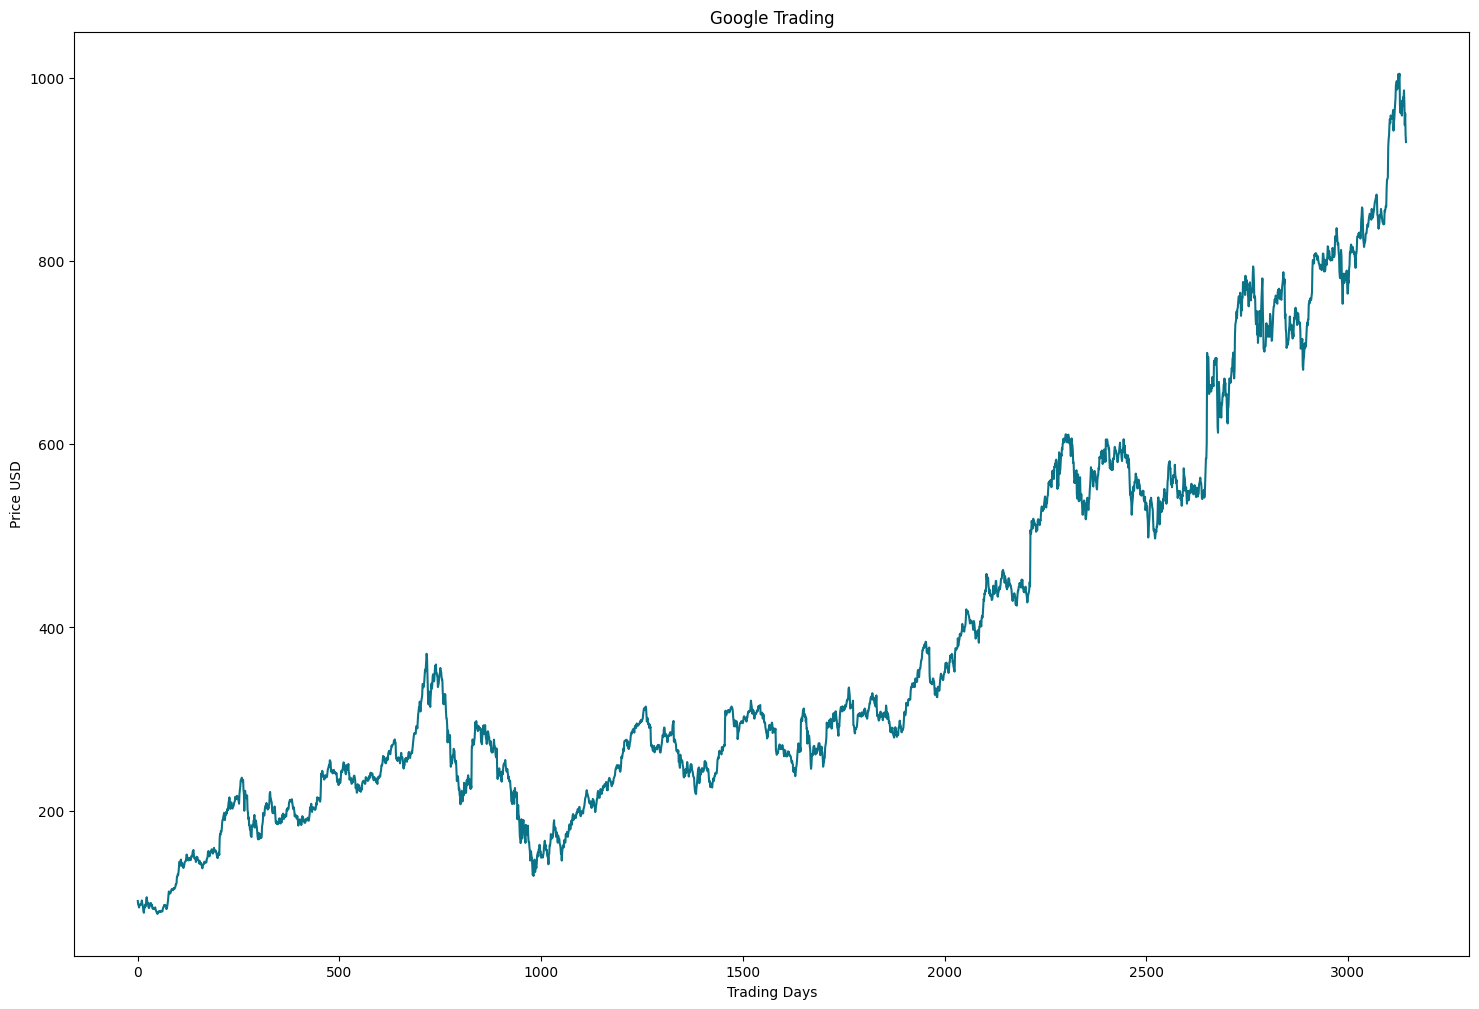

In [13]:
plot_basic(stocks)

In [14]:
stocks = get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.012051  0.015141  0.377248
1     1  0.014198  0.010658  0.325644
2     2  0.009894  0.010112  0.189820
3     3  0.010874  0.007407  0.242701
4     4  0.008368  0.010298  0.224905


Open   --- mean : 0.32119222938868175   	 Std:  0.23261946808306658   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.3215558503465895   	 Std:  0.23283076112482215   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.09061506381049178   	 Std:  0.09535947661989863   	 Max:  0.9999999999999999   	 Min:  0.0


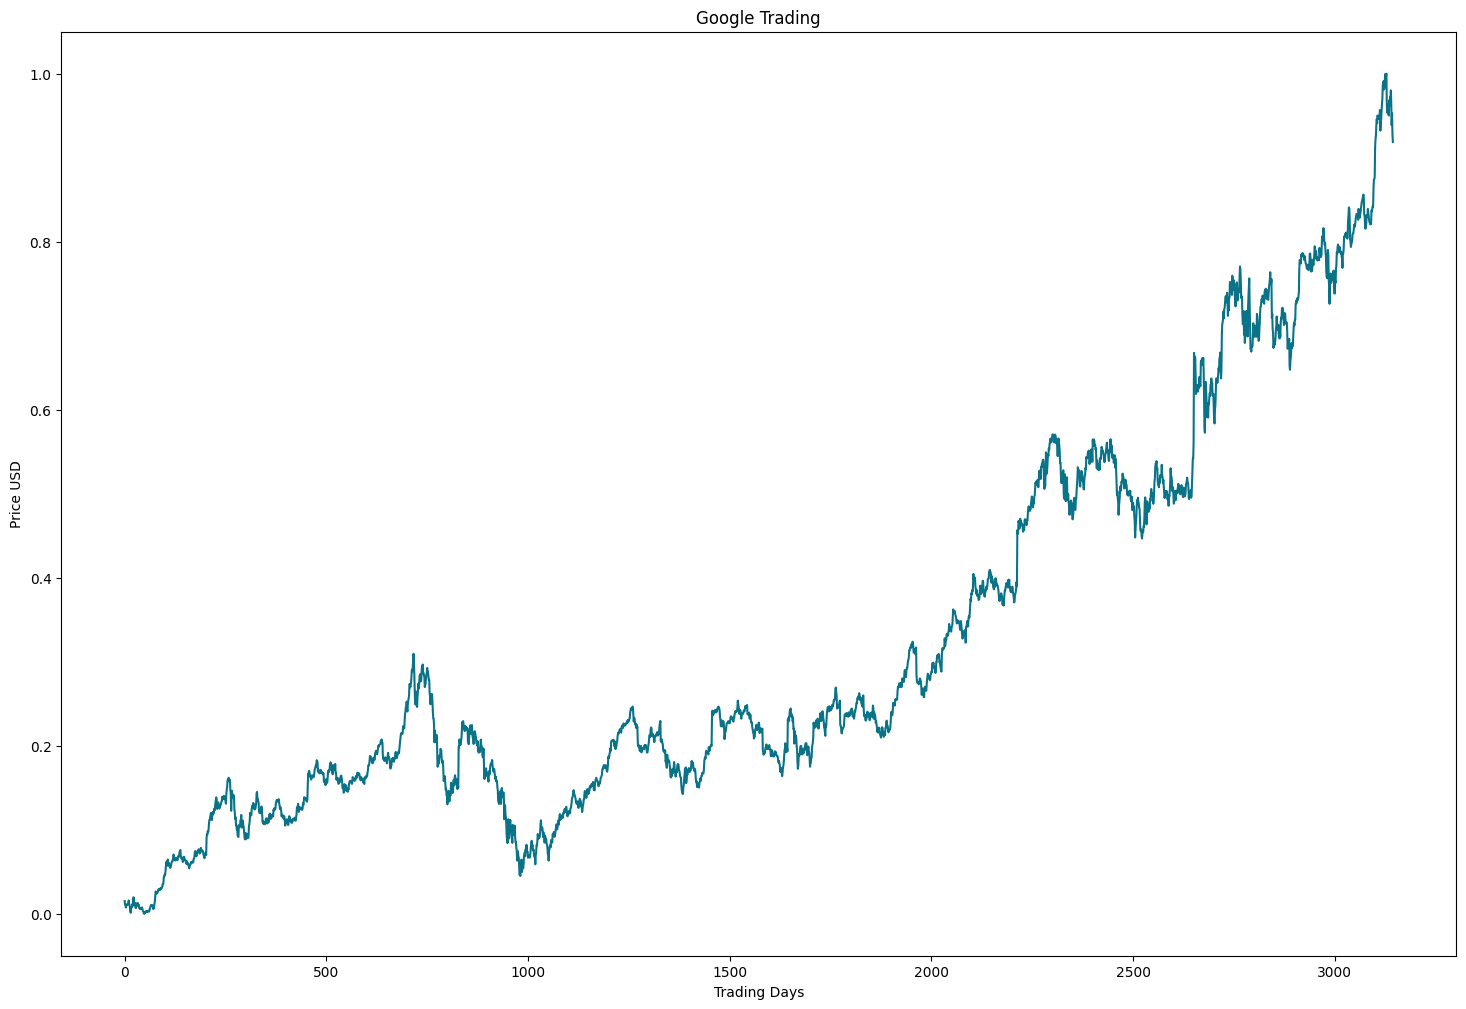

In [15]:
plot_basic(stocks)

In [16]:
stocks.to_csv('google_preprocessed.csv',index= False)

In [17]:

import numpy as np
import math

def scale_range(x, input_range, target_range):
    """
    Rescale a numpy array from input to target range
    """
    range_ = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0 * (input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0 * (target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range_

def train_test_split_linear_regression(stocks):
    """
    Split the dataset into training and testing features for a Linear Regression Model
    """
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays
    for index, row in stocks.iterrows():
        feature.append([row['Item']])
        label.append([row['Close']])

    # Regularize features and targets
    feature_bounds = [min(feature)[0], max(feature)[0]]
    label_bounds = [min(label)[0], max(label)[0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = int(math.floor(len(stocks['Item']) * 0.315))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]
    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range

def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
    """
    Split the dataset into training and testing features for an LSTM model
    """
    test_data_cut = test_data_size + unroll_length + 1

    # Use .to_numpy() instead of .as_matrix()
    x_train = stocks.iloc[0:-prediction_time - test_data_cut].to_numpy()
    y_train = stocks.iloc[prediction_time:-test_data_cut]['Close'].to_numpy()

    x_test = stocks.iloc[0 - test_data_cut:-prediction_time].to_numpy()
    y_test = stocks.iloc[prediction_time - test_data_cut:]['Close'].to_numpy()

    return x_train, x_test, y_train, y_test

def unroll(data, sequence_length=24):
    """
    Unroll data using a sliding window approach
    """
    return np.asarray([data[i: i + sequence_length] for i in range(len(data) - sequence_length)])


In [18]:
from sklearn import linear_model
import numpy as np


def build_model(X, y):
    """
    build a linear regression model using sklearn.linear_model
    :param X: Feature dataset
    :param y: label dataset
    :return: a linear regression model
    """
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod


def predict_prices(model, x, label_range):
    """
    Predict the label for given test sets
    :param model: a linear regression model
    :param x: testing features
    :param label_range: normalised range of label data
    :return: predicted labels for given features
    """
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()

In [19]:
from sklearn import linear_model
import numpy as np

def build_model(X, y):
    """
    build a linear regression model using sklearn.linear_model
    :param X: Feature dataset
    :param y: label dataset
    :return: a linear regression model
    """
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod


def predict_prices(model, x, label_range):
    """
    Predict the label for given test sets
    :param model: a linear regression model
    :param x: testing features
    :param label_range: normalised range of label data
    :return: predicted labels for given features
    """
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()




In [20]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.012051,0.015141,0.377248
1,1,0.014198,0.010658,0.325644
2,2,0.009894,0.010112,0.189820
3,3,0.010874,0.007407,0.242701
4,4,0.008368,0.010298,0.224905


In [21]:
X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2155, 1)
y_train (2155, 1)
x_test (990, 1)
y_test (990, 1)


In [22]:
model = build_model(X_train,y_train)

In [23]:
predictions = predict_prices(model,X_test, label_range)

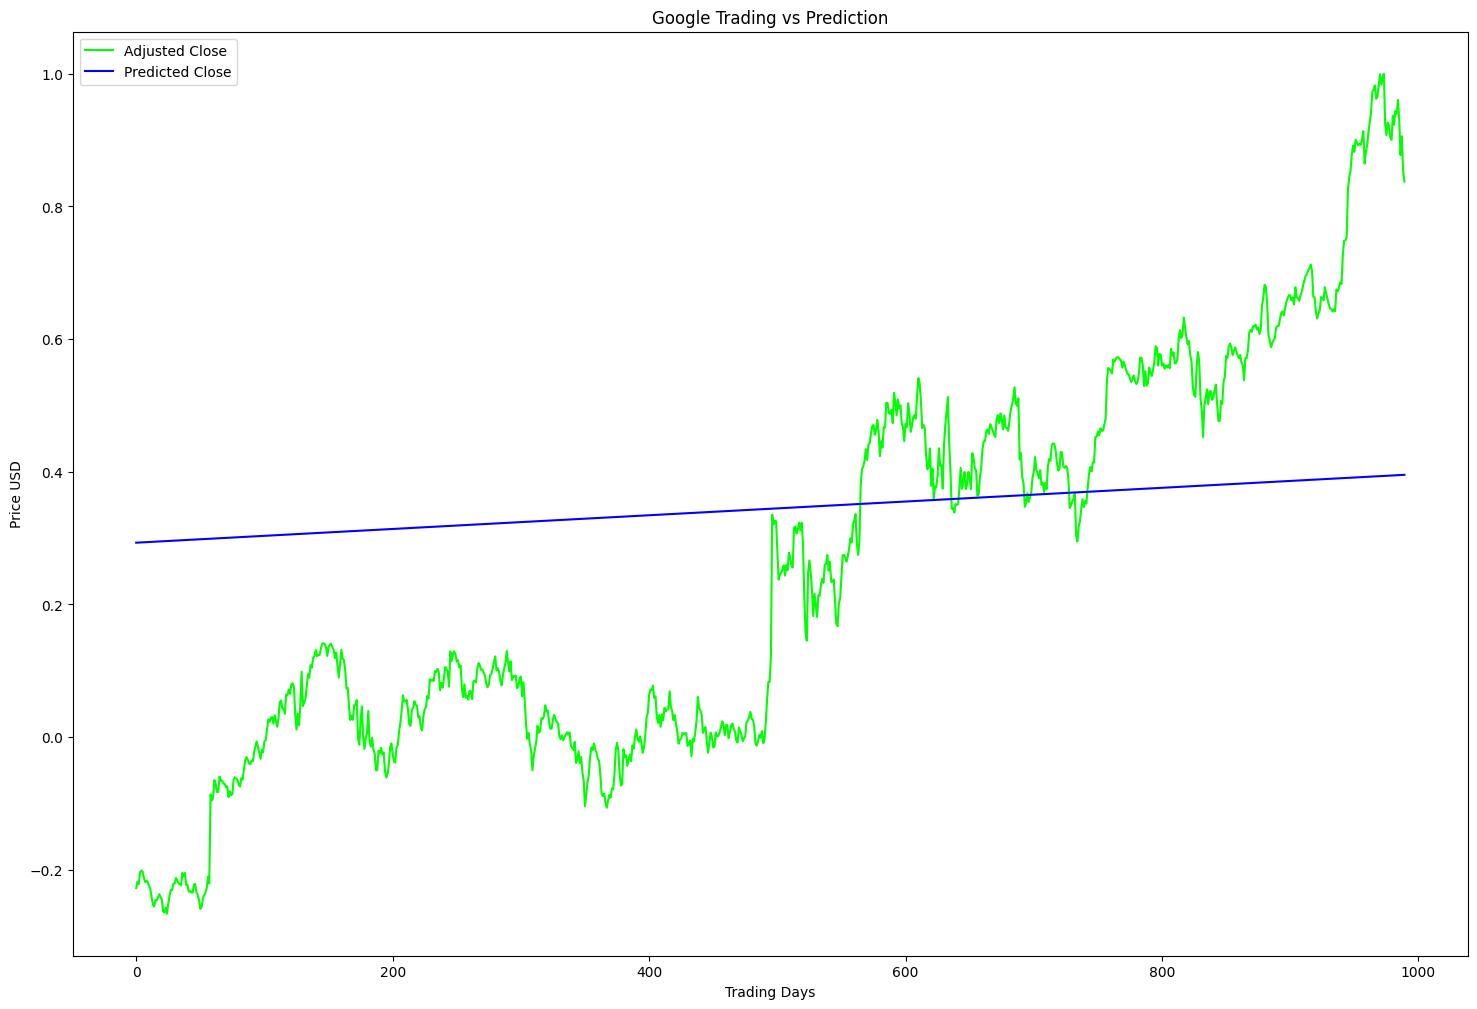

In [24]:
plot_prediction(y_test,predictions)

In [25]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.1852 MSE (0.4303 RMSE)
Test Score: 0.08133781 MSE (0.28519784 RMSE)


In [26]:
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential


def build_improved_model(input_dim, output_dim, return_sequences):
    """
    Builds an improved Long Short term memory model using keras.layers.recurrent.lstm
    :param input_dim: input dimension of model
    :param output_dim: ouput dimension of model
    :param return_sequences: return sequence for the model
    :return: a 3 layered LSTM model
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model


def build_basic_model(input_dim, output_dim, return_sequences):
    """
    Builds a basic lstm model
    :param input_dim: input dimension of the model
    :param output_dim: output dimension of the model
    :param return_sequences: return sequence of the model
    :return: a basic lstm model with 3 layers.
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model




In [27]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import time #helper libraries


stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


In [28]:
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


In [29]:
# build basic lstm model
model = build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compilation time :  0.007269382476806641


In [30]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0120 - val_loss: 3.7166e-04


In [31]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


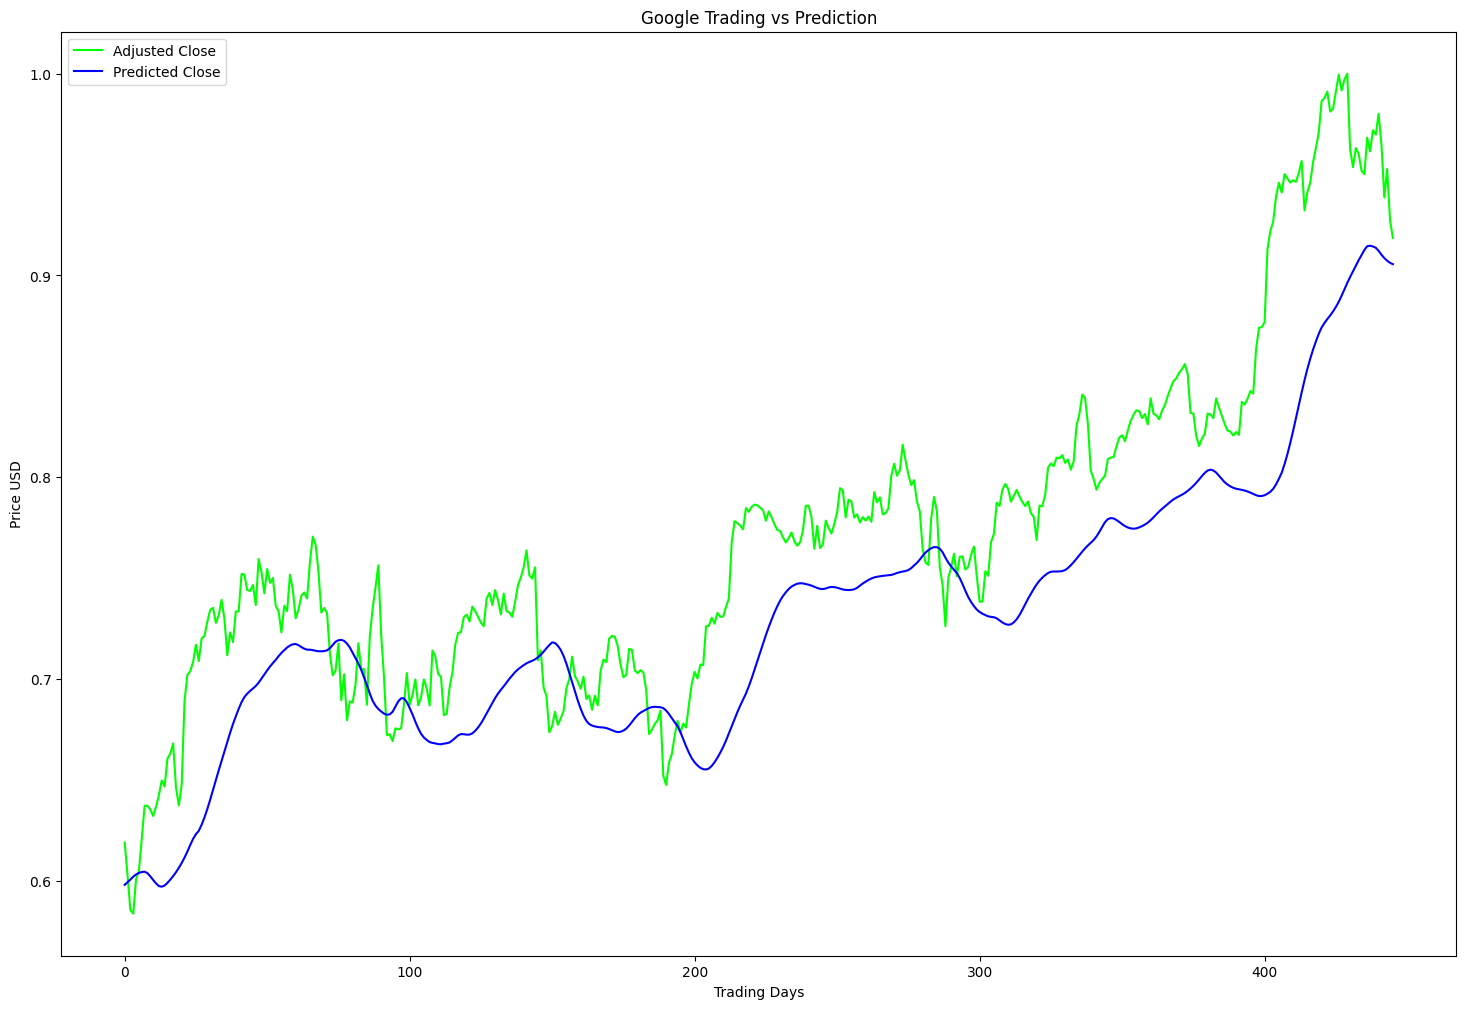

In [32]:
plot_lstm_prediction(y_test,predictions)

In [33]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00038726 MSE (0.01967881 RMSE)
Test Score: 0.00274030 MSE (0.05234786 RMSE)


In [34]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0029883384704589844


In [35]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
25/25 - 4s - 165ms/step - loss: 0.0107 - val_loss: 8.3966e-04
Epoch 2/5
25/25 - 0s - 12ms/step - loss: 9.2013e-04 - val_loss: 0.0018
Epoch 3/5
25/25 - 0s - 12ms/step - loss: 7.9544e-04 - val_loss: 2.7924e-04
Epoch 4/5
25/25 - 1s - 23ms/step - loss: 6.8345e-04 - val_loss: 3.1966e-04
Epoch 5/5
25/25 - 0s - 11ms/step - loss: 6.6041e-04 - val_loss: 4.1030e-04


In [36]:
predictions = model.predict(X_test, batch_size=batch_size)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


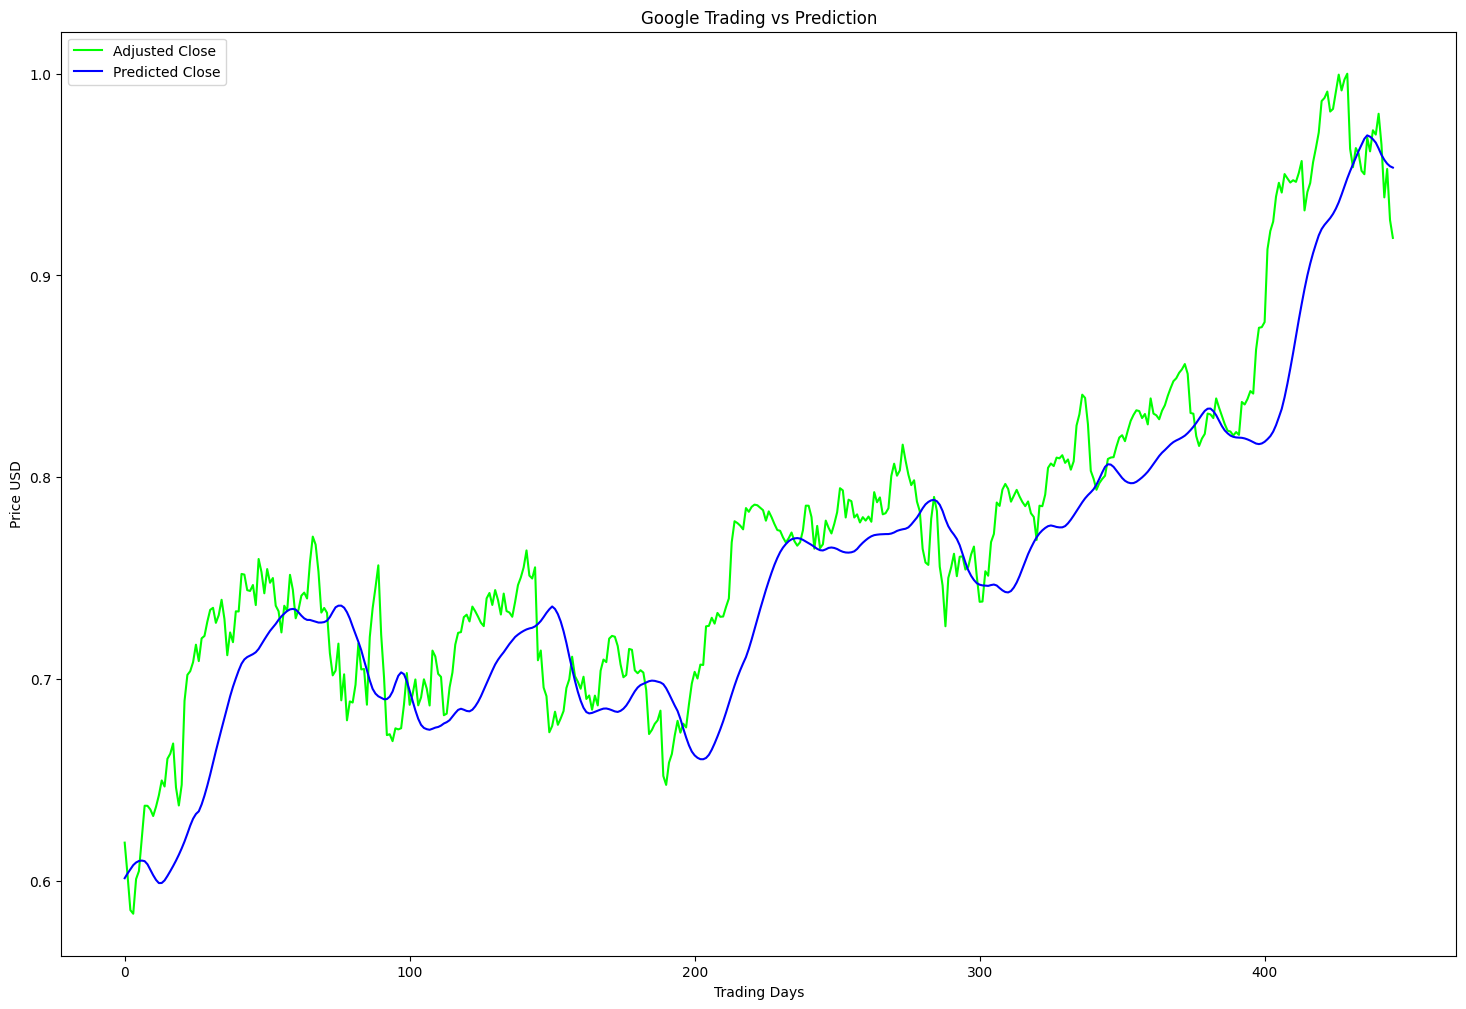

In [37]:
plot_lstm_prediction(y_test,predictions)

In [38]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00035498 MSE (0.01884083 RMSE)
Test Score: 0.00137104 MSE (0.03702755 RMSE)


In [39]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)

Delta Price: 0.001371 - RMSE * Adjusted Close Range
